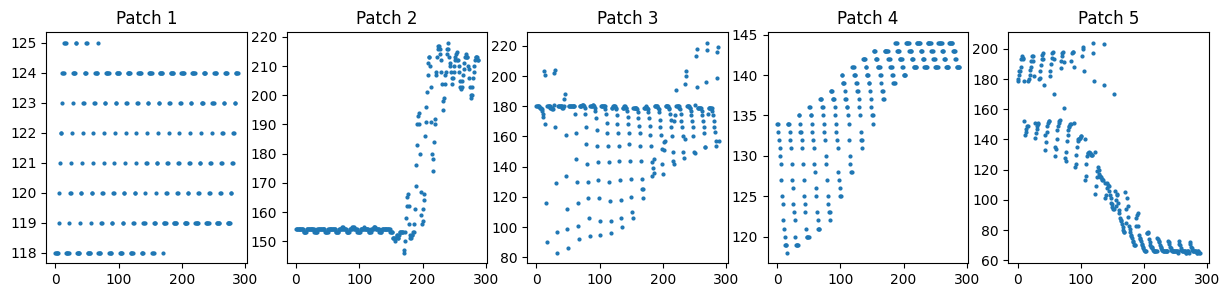

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_local_means_denoising(image, h=10):
    """
    Aplica o filtro Non-Local Means (NLM) em uma imagem.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param h: Fator de filtragem.
    :return: Imagem filtrada.
    """
    return cv2.fastNlMeansDenoising(image, None, h, 7, 21)

def extract_patches(image, patch_size=17):
    """
    Extrai cinco janelas específicas da imagem, aplica NLM e exibe os valores filtrados em um gráfico.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param patch_size: Tamanho da janela quadrada.
    """
    rows, cols = image.shape
    half_patch = patch_size // 2

    dist = 100
    
    # Definição das cinco janelas
    positions = [
        (100, 100),
        (100, cols - 100 - patch_size),
        (rows - 100 - patch_size, 50),
        (rows - 100 - patch_size, cols - 100 - patch_size),
        (rows // 2 - half_patch, cols // 2 - half_patch)
    ]
    
    denoised_patches = []
    for (i, j) in positions:
        patch = image[i:i + patch_size, j:j + patch_size]
        denoised_patch = non_local_means_denoising(patch)
        denoised_patches.append(denoised_patch)
    
    # Exibir os pontos dos patches filtrados em um gráfico
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for idx, patch in enumerate(denoised_patches):
        axes[idx].plot(patch.flatten(), 'o', markersize=2)
        axes[idx].set_title(f"Patch {idx+1}")
    
    plt.show()

# Exemplo de uso
if __name__ == "__main__":
    img = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE)
    extract_patches(img, patch_size=17)

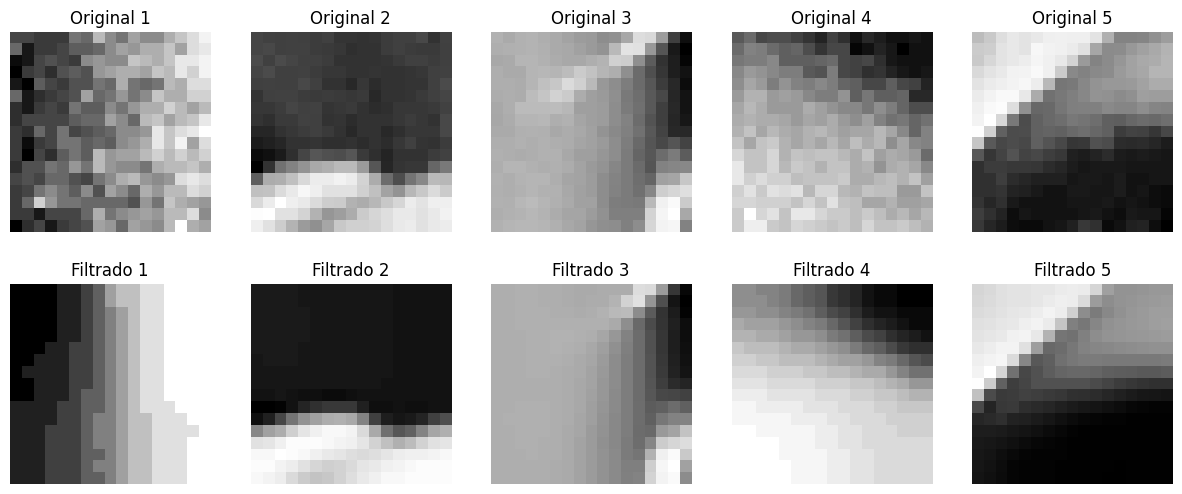

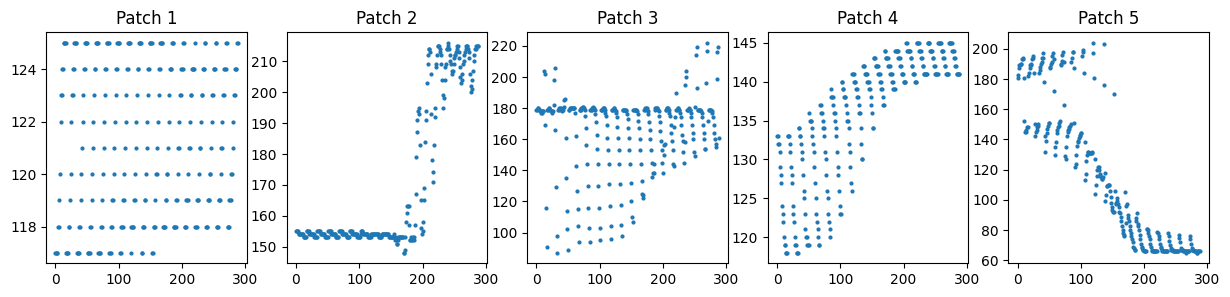

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_local_means_denoising(image, h=10):
    """
    Aplica o filtro Non-Local Means (NLM) em uma imagem.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param h: Fator de filtragem.
    :return: Imagem filtrada.
    """
    return cv2.fastNlMeansDenoising(image, None, h, 5, 17)

def extract_patches(image, patch_size=17):
    """
    Extrai cinco janelas específicas da imagem, aplica NLM e exibe os patches originais e filtrados.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param patch_size: Tamanho da janela quadrada.
    """
    rows, cols = image.shape
    half_patch = patch_size // 2
    
    dist = 100
    
    # Definição das cinco janelas
    positions = [
        (dist, dist),
        (dist, cols - dist - patch_size),
        (rows - dist - patch_size, 50),
        (rows - dist - patch_size, cols - dist - patch_size),
        (rows // 2 - half_patch, cols // 2 - half_patch)
    ]
    
    original_patches = []
    denoised_patches = []
    for (i, j) in positions:
        patch = image[i:i + patch_size, j:j + patch_size]
        original_patches.append(patch)
        denoised_patch = non_local_means_denoising(patch)
        denoised_patches.append(denoised_patch)
    
    # Exibir os patches originais e filtrados
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for idx in range(5):
        axes[0, idx].imshow(original_patches[idx], cmap='gray')
        axes[0, idx].set_title(f"Original {idx+1}")
        axes[0, idx].axis("off")
        
        axes[1, idx].imshow(denoised_patches[idx], cmap='gray')
        axes[1, idx].set_title(f"Filtrado {idx+1}")
        axes[1, idx].axis("off")
    
    plt.show()
    
    # Exibir os valores dos patches filtrados em um gráfico
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for idx, patch in enumerate(denoised_patches):
        axes[idx].plot(patch.flatten(), 'o', markersize=2)
        axes[idx].set_title(f"Patch {idx+1}")
    
    plt.show()

    return original_patches,denoised_patches

# Exemplo de uso
if __name__ == "__main__":
    img = cv2.imread("images/Lenna_ruidosa.png", cv2.IMREAD_GRAYSCALE)
    original_patches,denoised_patches = extract_patches(img, patch_size=17)


In [12]:
denoised_patches[0][0]

array([117, 117, 117, 117, 118, 118, 119, 120, 122, 123, 123, 124, 124,
       125, 125, 125, 125], dtype=uint8)

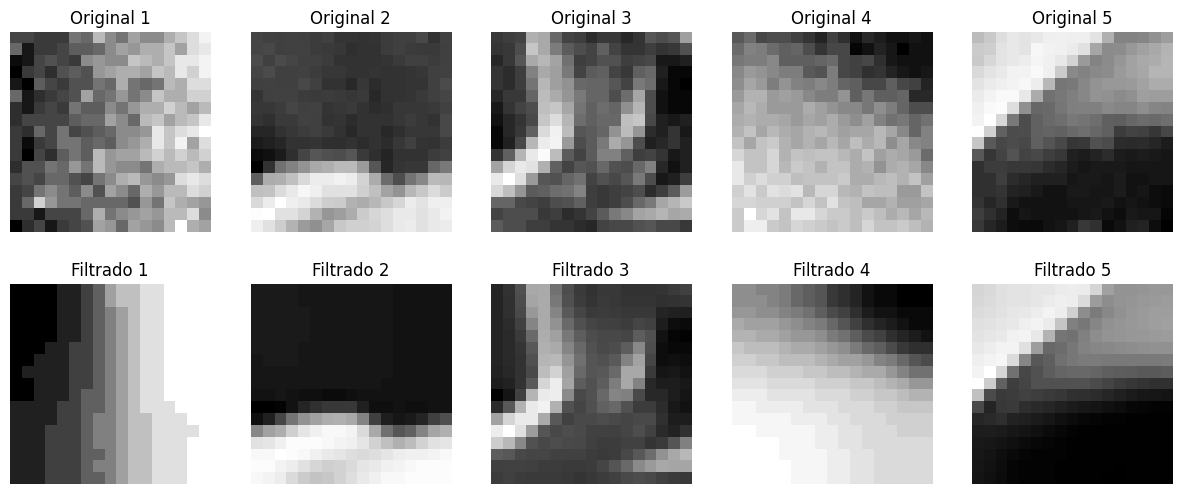

C:\Users\adria\AppData\Local\Temp\ipykernel_10460\1162067608.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend()


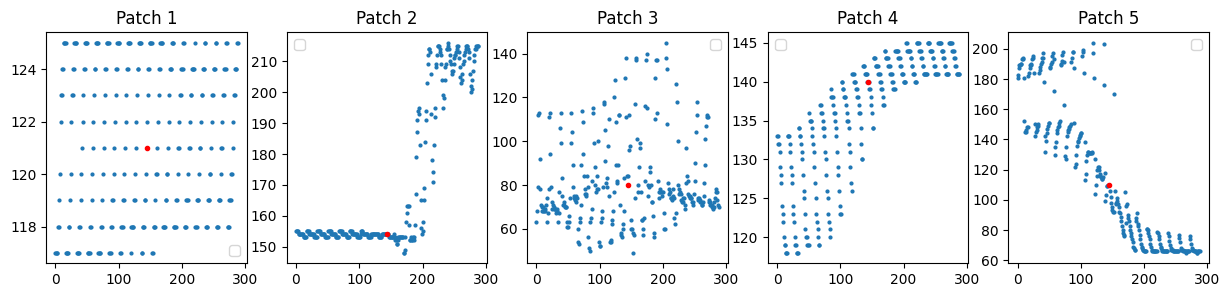

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def non_local_means_denoising(image, h=10):
    """
    Aplica o filtro Non-Local Means (NLM) em uma imagem.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param h: Fator de filtragem.
    :return: Imagem filtrada.
    """
    return cv2.fastNlMeansDenoising(image, None, h, 5, 17)

def extract_patches(image, patch_size=17):
    """
    Extrai cinco janelas específicas da imagem, aplica NLM e exibe os patches originais e filtrados.
    :param image: Imagem de entrada (numpy array, escala de cinza).
    :param patch_size: Tamanho da janela quadrada.
    """
    rows, cols = image.shape
    half_patch = patch_size // 2
    dist = 100

    # Definição das cinco janelas
    positions = [
        (dist, dist),
        (dist, cols - dist - patch_size),
        (rows - dist - patch_size, dist),
        (rows - dist - patch_size, cols - dist - patch_size),
        (rows // 2 - half_patch, cols // 2 - half_patch)
    ]

    original_patches = []
    denoised_patches = []
    for (i, j) in positions:
        patch = image[i:i + patch_size, j:j + patch_size]
        original_patches.append(patch)
        denoised_patch = non_local_means_denoising(patch)
        denoised_patches.append(denoised_patch)

    # Exibir os patches originais e filtrados
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for idx in range(5):
        axes[0, idx].imshow(original_patches[idx], cmap='gray')
        axes[0, idx].set_title(f"Original {idx+1}")
        axes[0, idx].axis("off")

        axes[1, idx].imshow(denoised_patches[idx], cmap='gray')
        axes[1, idx].set_title(f"Filtrado {idx+1}")
        axes[1, idx].axis("off")

    plt.show()

    # Exibir os valores dos patches filtrados em um gráfico
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for idx, patch in enumerate(denoised_patches):
        flattened_patch = patch.flatten()
        center_idx = (patch_size * patch_size) // 2  # Índice do pixel central no vetor achatado
        center_value = flattened_patch[center_idx]  # Valor do pixel central

        axes[idx].plot(flattened_patch, 'o', markersize=2 )
        axes[idx].plot(center_idx, center_value, 'ro', markersize=3)  # Destaque em vermelho
        axes[idx].set_title(f"Patch {idx+1}")
        axes[idx].legend()

    plt.show()

    return original_patches, denoised_patches

# Exemplo de uso
if __name__ == "__main__":
    img = cv2.imread("images/Lenna_ruidosa.png", cv2.IMREAD_GRAYSCALE)
    original_patches, denoised_patches = extract_patches(img, patch_size=17)


In [9]:
img = cv2.imread("images/Lenna_ruidosa.png", cv2.IMREAD_GRAYSCALE)

denoisg_img = non_local_means_denoising(img)

cv2.imwrite('teste.png', denoisg_img)

True